In [1]:
#NUMERICAL LIBRARIES
import numpy as np

#TO HANDLE DATA IN THE FORM OF ROWS & COLUMNS
import pandas as pd

#TO VISUALISE DATA
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTING LINEAR REGRESSION MACHINE LEARNING LIBRARY
from sklearn.linear_model import LinearRegression

In [13]:
#READING THE CSV FILE INTO PANDAS DATAFRAME
stock_df = pd.read_csv('/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')

In [14]:
#CHECKING NULL VALUES
stock_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Stock Trading,0


In [15]:
#TO CHECK THE DATA STRUCTURE CHECK THE FIRST FEW RECORDS
stock_df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [16]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [17]:
#DESCRIBING THE DATASET
stock_df.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


In [18]:
#TO CHECK THE TOTAL NUMBER OF ROWS & COLUMNS
stock_df.shape

(1226, 7)

In [19]:
#TO CHECK THE DATATYPES PRESENT IN THE DATASET
stock_df.dtypes

,0
Date,object
Open,int64
High,int64
Low,int64
Close,int64
Volume,int64
Stock Trading,int64


In [20]:
#TO CHECK COLUMNS
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')

# ***EXPLORATORY DATA ANALYSIS***

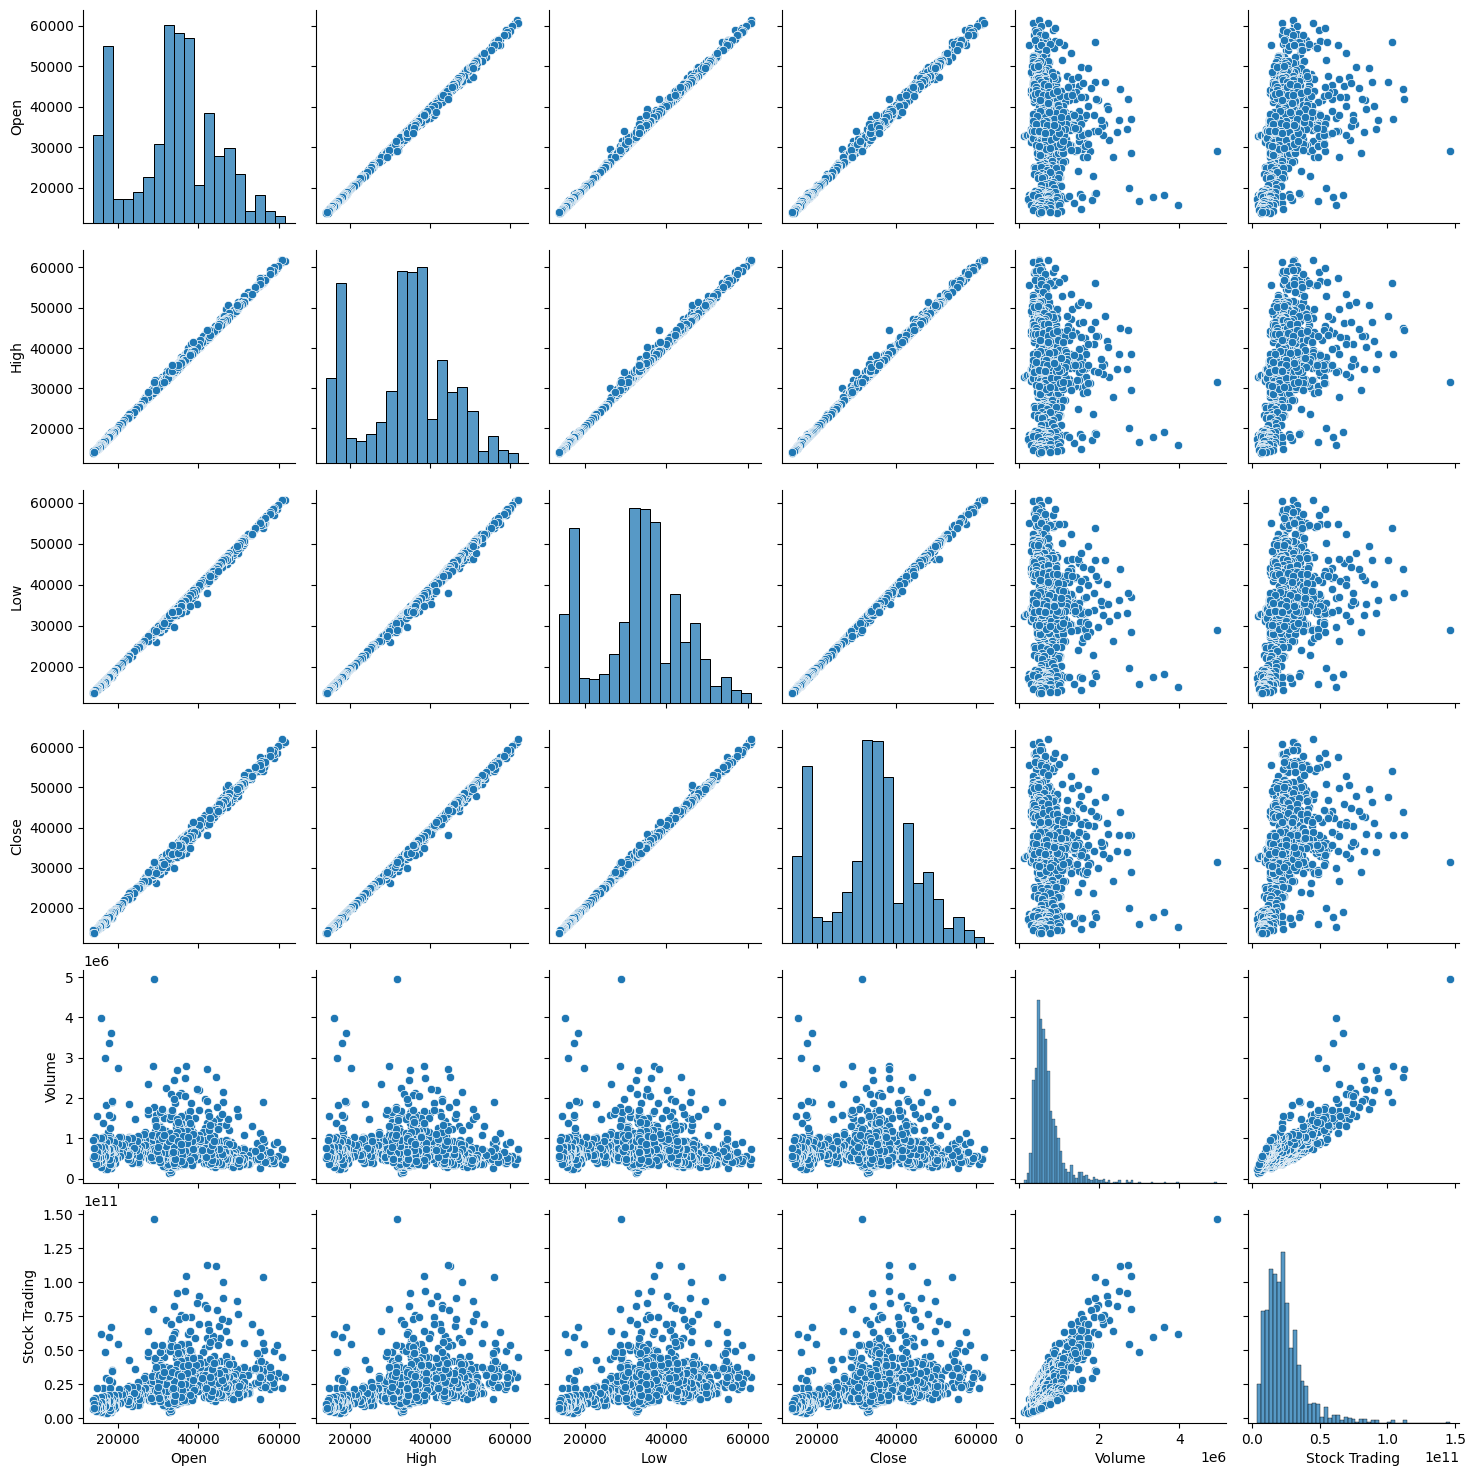

In [21]:
#MULTIVARIATE
sns.pairplot(stock_df)
plt.show()

***STOCK TRADING IS OUR TARGET VARIABLE***

***HISTOGRAM***

<ipython-input-22-4ad6a182f5ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_df['Stock Trading'], bins = 20)


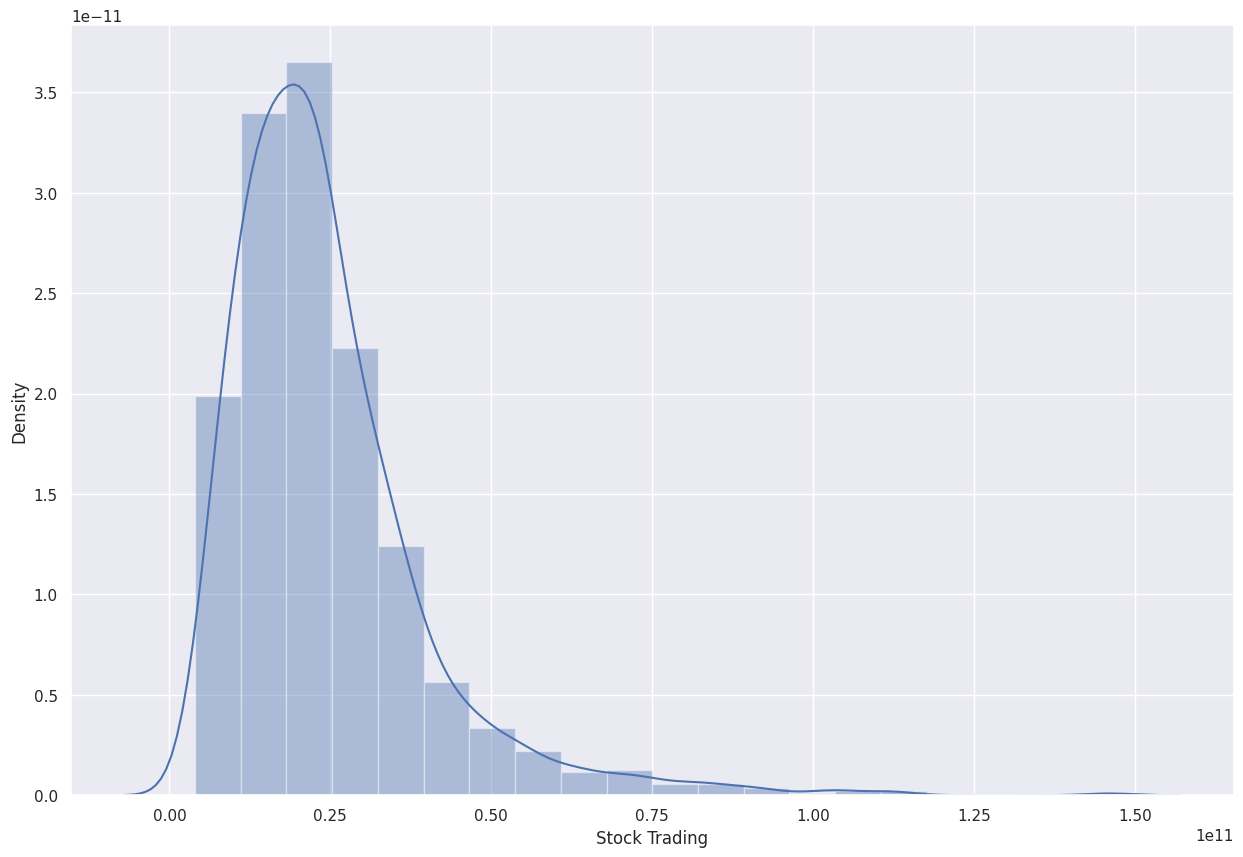

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(stock_df['Stock Trading'], bins = 20)
plt.show()

***CORRELATION HEATMAP***

In [23]:
numeric_features = stock_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')

In [24]:
categorical_features = stock_df.select_dtypes(include=[object])
categorical_features.columns

Index(['Date'], dtype='object')

In [25]:
correlation = numeric_features.corr()
print(correlation['Stock Trading'].sort_values(ascending=False))

Stock Trading    1.000000
Volume           0.836372
High             0.459909
Close            0.446747
Open             0.445820
Low              0.432993
Name: Stock Trading, dtype: float64


<Axes: title={'center': 'CORRELATION OF NUMERIC FEATURES WITH STOCK TRADING'}>

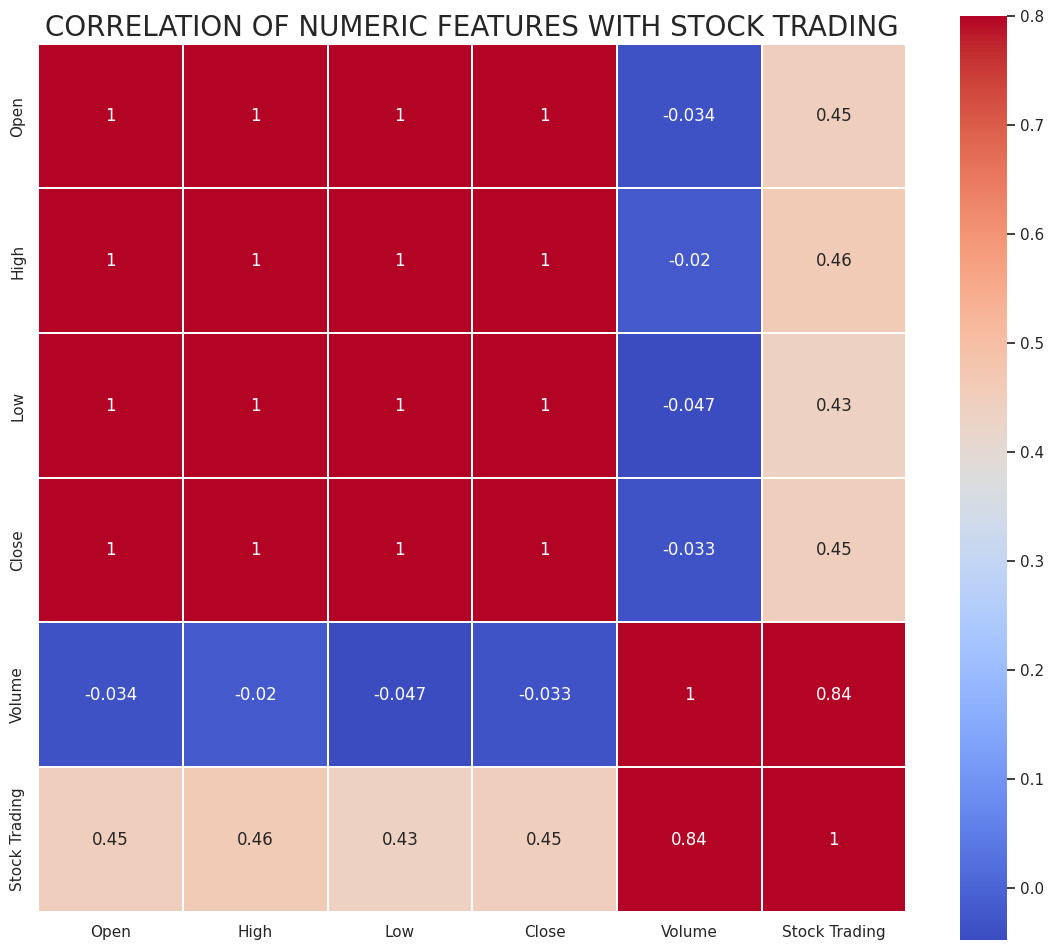

In [26]:
f , ax = plt.subplots(figsize=(14,12))
plt.title('CORRELATION OF NUMERIC FEATURES WITH STOCK TRADING', y=1, size=20)
sns.heatmap(correlation, square = True, vmax= 0.8, linewidths=0.1, cmap='coolwarm', linecolor='white', annot=True)

# ***SCATTERPLOT***

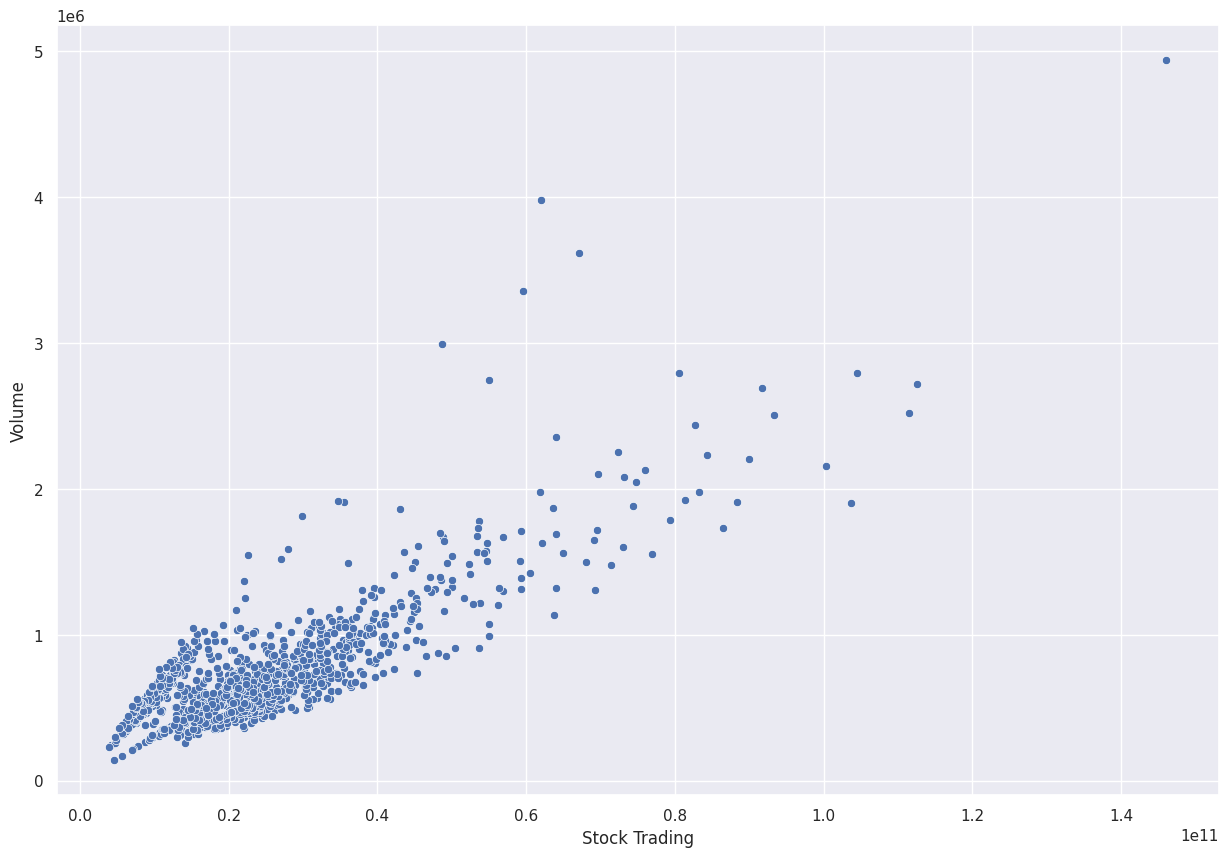

In [27]:
sns.scatterplot(x='Stock Trading', y='Volume', data=stock_df)
plt.show()

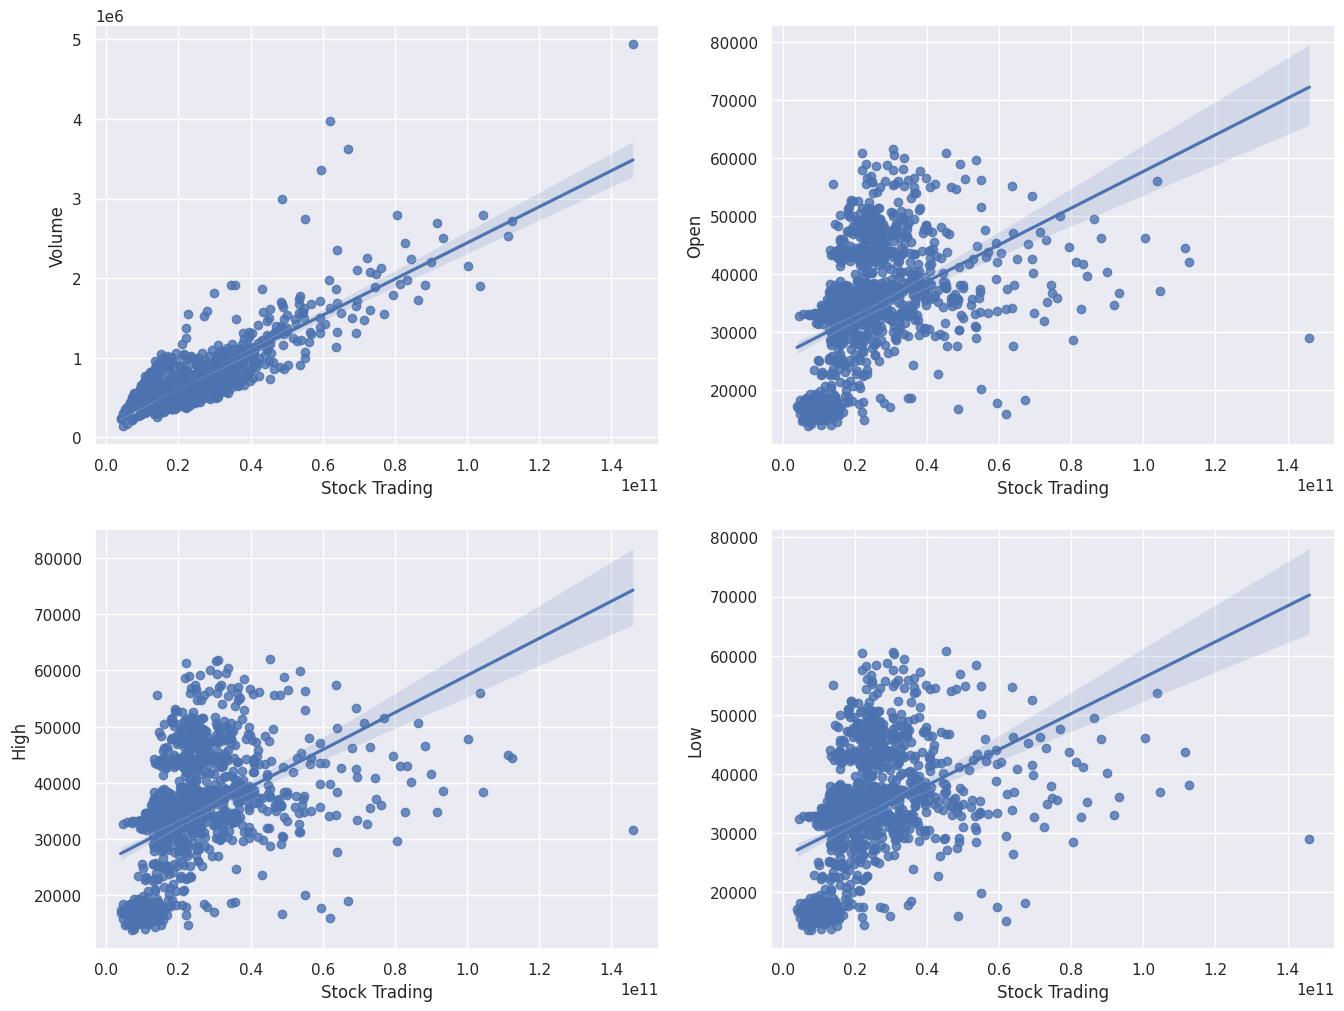

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.regplot(x='Stock Trading', y='Volume', data=stock_df, scatter= True, ax=ax1)
sns.regplot(x='Stock Trading', y='Open', data=stock_df, scatter= True, ax=ax2)
sns.regplot(x='Stock Trading', y='High', data=stock_df, scatter= True, ax=ax3)
sns.regplot(x='Stock Trading', y='Low', data=stock_df, scatter= True, ax=ax4)
plt.show()

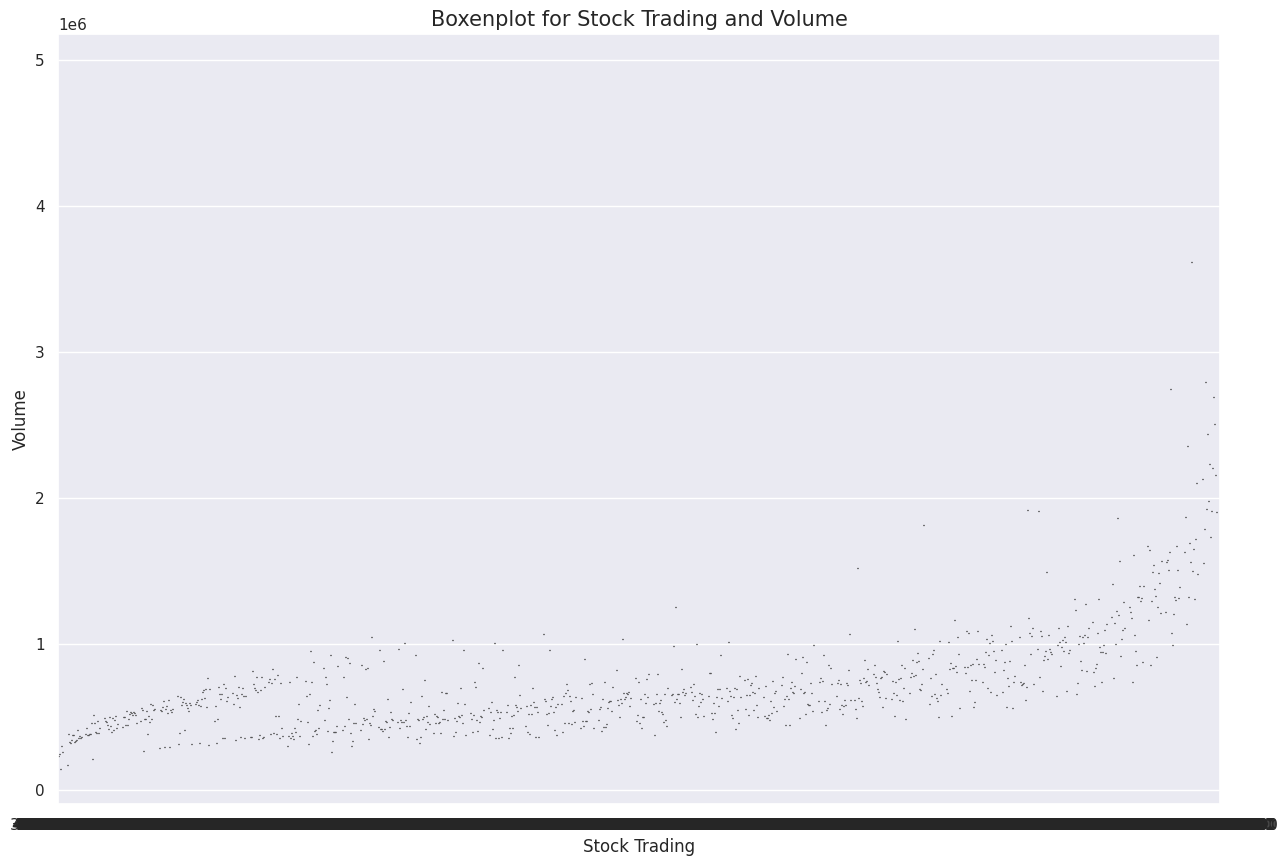

In [29]:
#BIVARIATE
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Stock Trading", y='Volume',data=stock_df)
plt.title('Boxenplot for Stock Trading and Volume',fontsize=15)
plt.show()

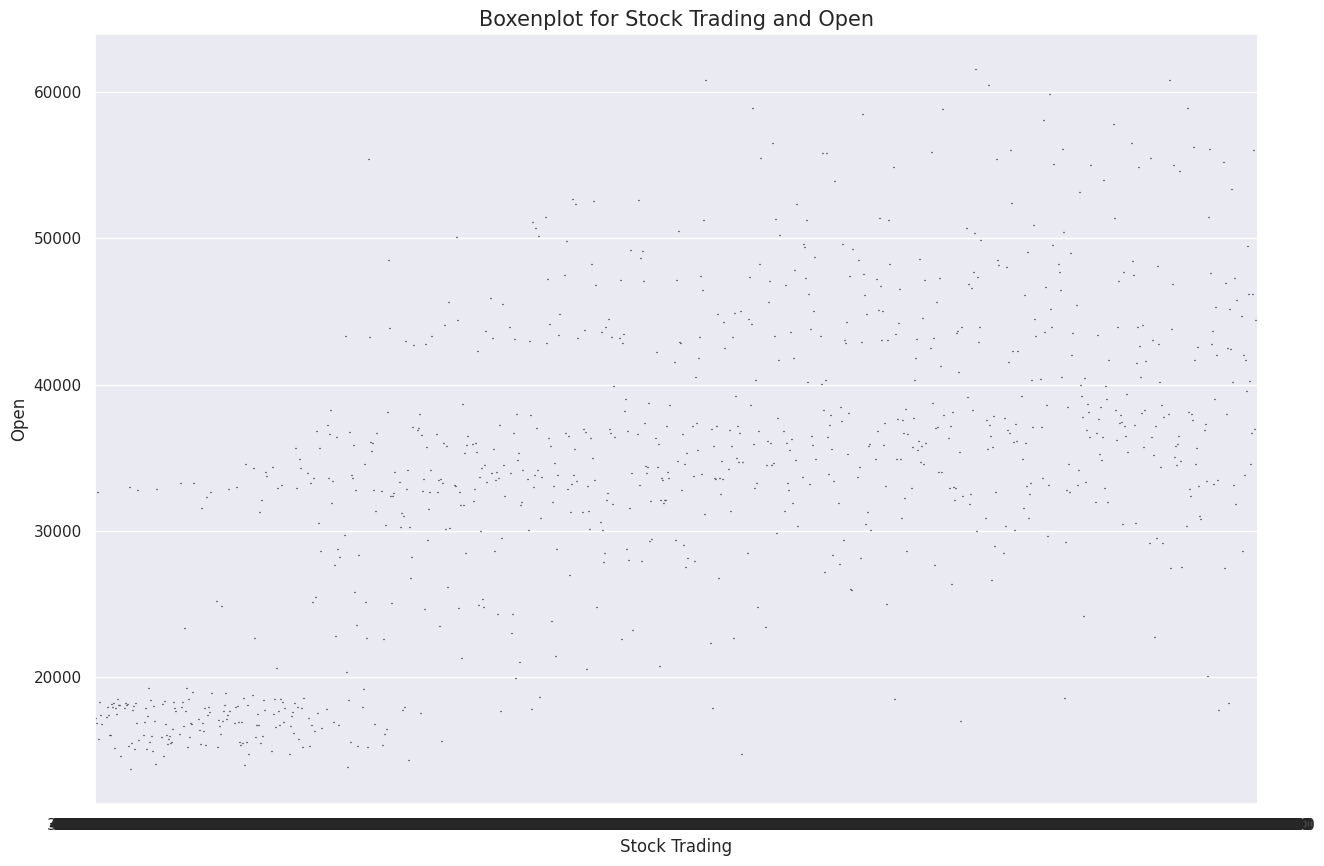

In [30]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Stock Trading", y='Open',data=stock_df)
plt.title('Boxenplot for Stock Trading and Open',fontsize=15)
plt.show()

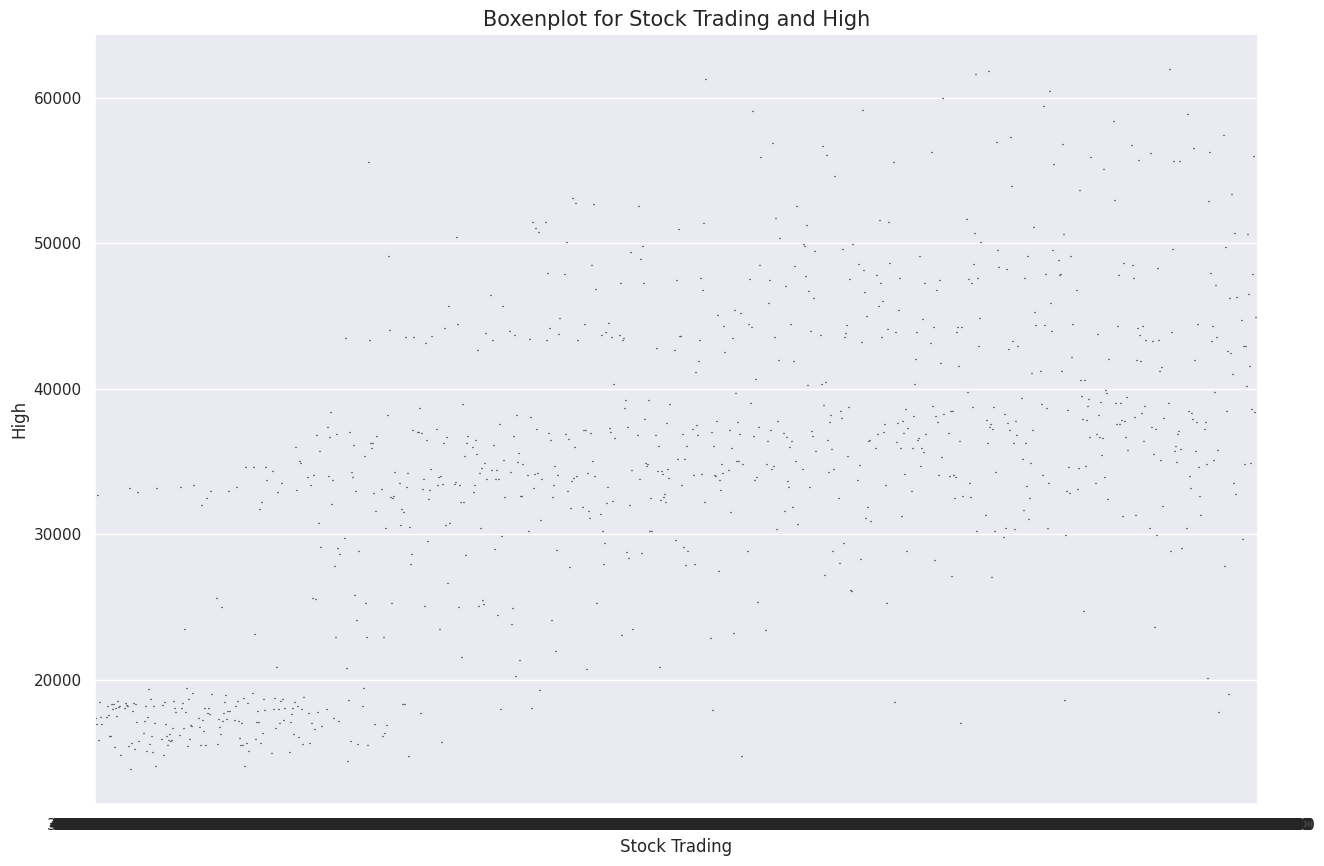

In [31]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Stock Trading", y='High',data=stock_df)
plt.title('Boxenplot for Stock Trading and High',fontsize=15)
plt.show()

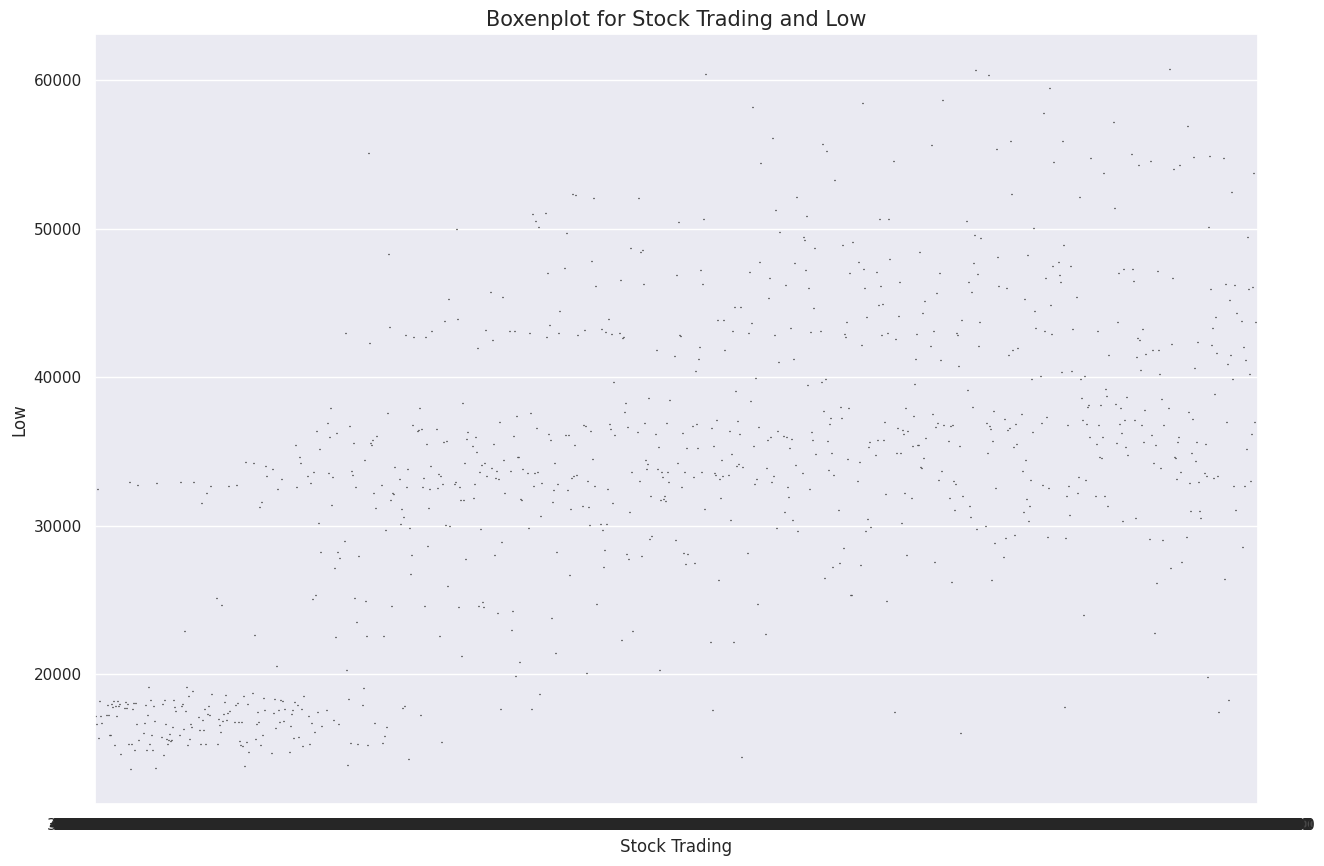

In [32]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Stock Trading", y='Low',data=stock_df)
plt.title('Boxenplot for Stock Trading and Low',fontsize=15)
plt.show()

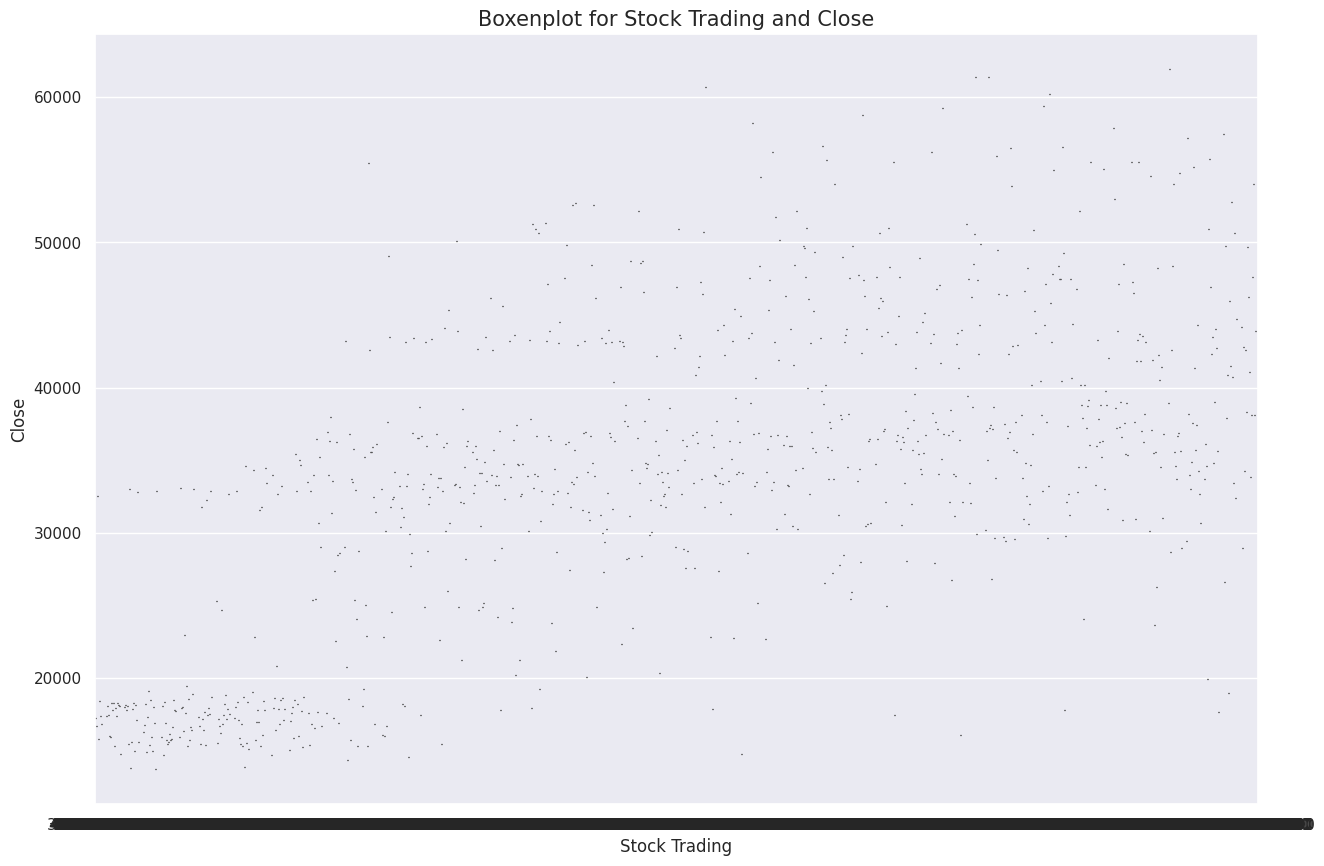

In [33]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Stock Trading", y='Close',data=stock_df)
plt.title('Boxenplot for Stock Trading and Close',fontsize=15)
plt.show()

# ***OUTLIERS***

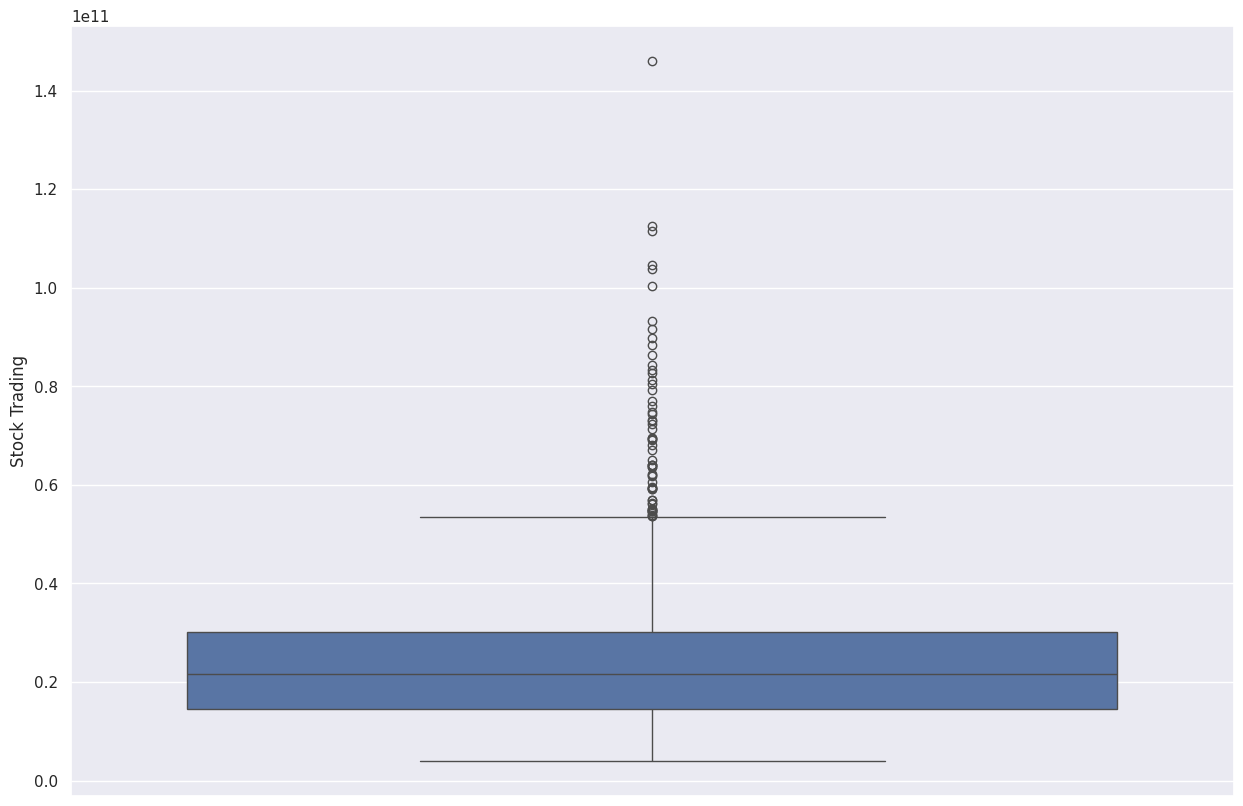

In [34]:
sns.boxplot(stock_df['Stock Trading'])
plt.show()

In [35]:
stock_df.shape

(1226, 7)

In [36]:
first_quartile= stock_df['Stock Trading'].quantile(0.25)
third_quartile= stock_df['Stock Trading'].quantile(0.75)
IQR= third_quartile - first_quartile

In [42]:
new_boundary= third_quartile + 1.5*IQR


In [43]:
new_stock_df= stock_df.drop(stock_df[stock_df['Stock Trading'] > new_boundary].index, axis=0)

In [44]:
new_stock_df.shape

(1166, 7)

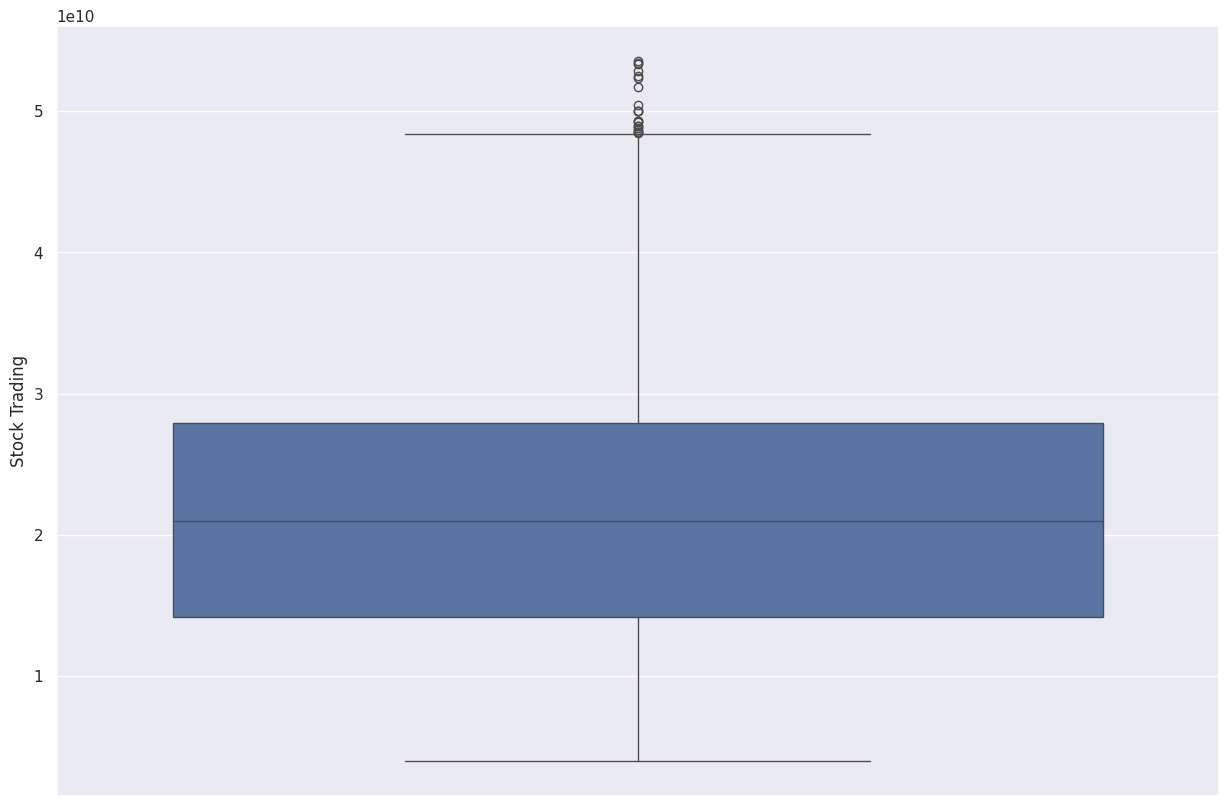

In [45]:
sns.boxplot(new_stock_df['Stock Trading'])
plt.show()

# ***LINEAR REGRESSION***

In [51]:
X= new_stock_df.drop('Stock Trading', axis=1)
y= new_stock_df['Stock Trading']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [53]:
new_stock_df.drop('Date', axis=1, inplace=True)

KeyError: "['Date'] not found in axis"

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
print(X_train, y_train)

[[ 0.7511591   0.82001023  0.79331336  0.8195728   0.28016149]
 [-0.45738395 -0.45738091 -0.46142301 -0.45107517  0.45363821]
 [ 0.31240644  0.2812185   0.25215559  0.277856    0.18677858]
 ...
 [-1.3497465  -1.37236227 -1.36054142 -1.3681475   0.34337454]
 [ 0.64297987  0.67899654  0.66071799  0.6467239   0.51936541]
 [-1.57724789 -1.59008374 -1.59762007 -1.61467731  1.04697885]] 499     31726090500
154     22800138000
843     26367525000
456     19115553000
140     19843414000
           ...     
758     44737245000
961     11022469000
1154    14374971000
243     33186218000
1119    15627555000
Name: Stock Trading, Length: 816, dtype: int64


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = mean_absolute_error(y_test, lm_prediction)
mse_lm = mean_squared_error(y_test, lm_prediction)
rmse_lm = np.sqrt(mse_lm)

# RMSE is the square root of MSE

# Print the results
print(f"MAE: {mae_lm}")
print(f"MSE: {mse_lm}")
print(f"RMSE: {rmse_lm}")

MAE: 1564244957.3334503
MSE: 5.548999472140937e+18
RMSE: 2355631438.094877
